In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt  # data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [2]:
df=pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv") #load data into df
df.head(10) #show the first 10 values 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 # look for data with null value


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dnul=df.isnull().sum()
print(dnul)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# show the percentage of diabetes and non diabetes patient from this sample where 0 refers to non diabetes and 1 refers to diabetes

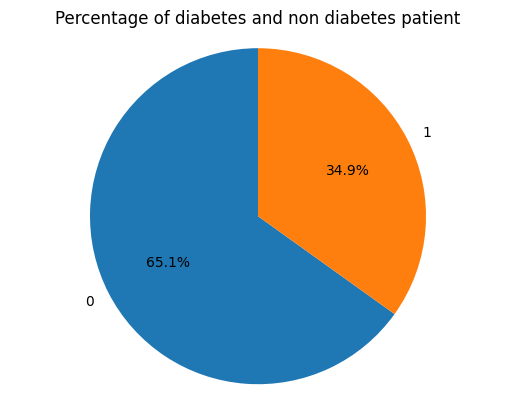

In [6]:
import matplotlib.pyplot as plt 
counts=df["Outcome"].value_counts()
value=counts.values
ind=counts.index 

fig,ax=plt.subplots()
ax.pie(x=value,labels=ind,autopct="%1.1f%%",startangle=90)
ax.axis("equal")
plt.title("Percentage of diabetes and non diabetes patient")
plt.show()

34.9 % from 768 patient are diabetes 

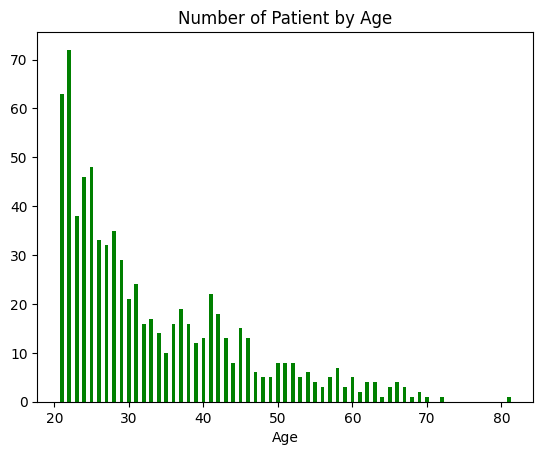

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


counts = df["Age"].value_counts()
val = counts.values
index = counts.index
fig, ax = plt.subplots()
ax.bar(x=index,height=val,color="green",width=0.5)

plt.xlabel("Age")
plt.title("Number of Patient by Age")
plt.show()

see the correlation between variables

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


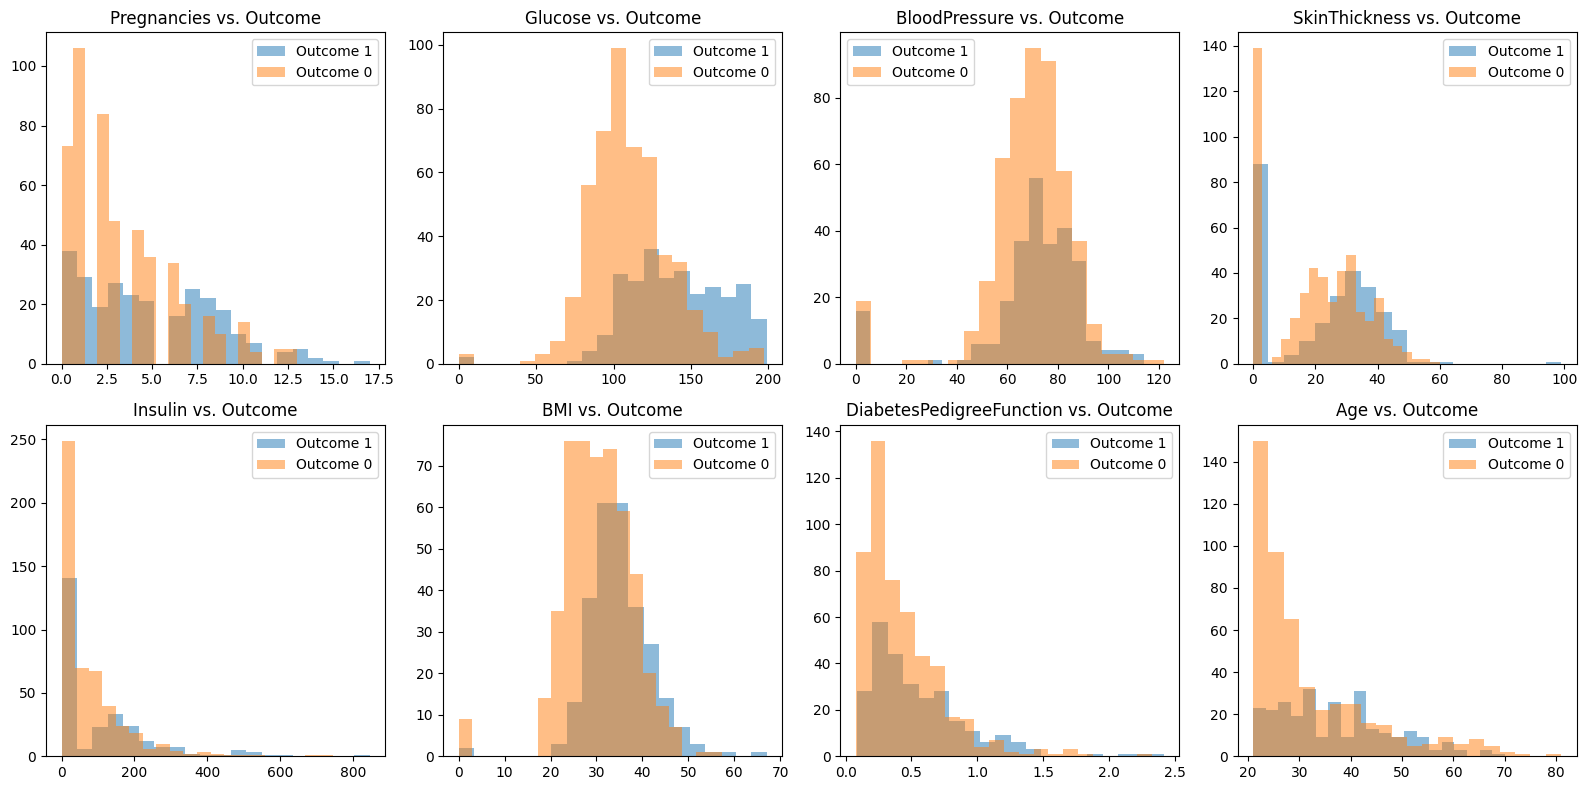

In [9]:
plt.figure(figsize=(16, 8))
# Assuming 'Outcome' is a binary column with values 0 and 1
outcomes = df['Outcome'].unique()

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    for outcome in outcomes:
        subset = df[df['Outcome'] == outcome]
        plt.hist(subset[col], bins=20, alpha=0.5, label=f'Outcome {outcome}')
    plt.title(f"{col} vs. Outcome")
    plt.legend()

plt.tight_layout()
plt.show()


<Axes: xlabel='Pregnancies', ylabel='Glucose'>

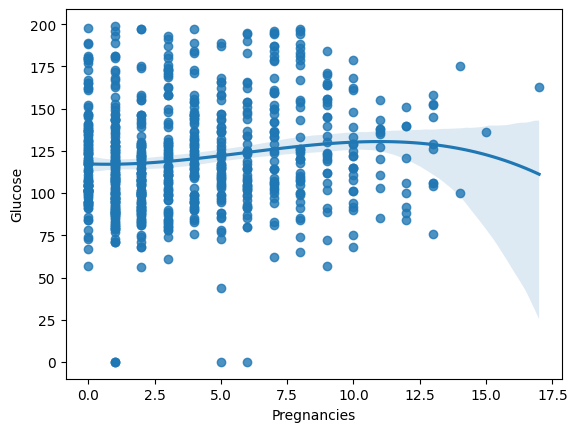

In [10]:
import seaborn as sns
sns.regplot(x="Pregnancies",y="Glucose",data=df,order=3)


Positive correlation between Age and Glucose

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

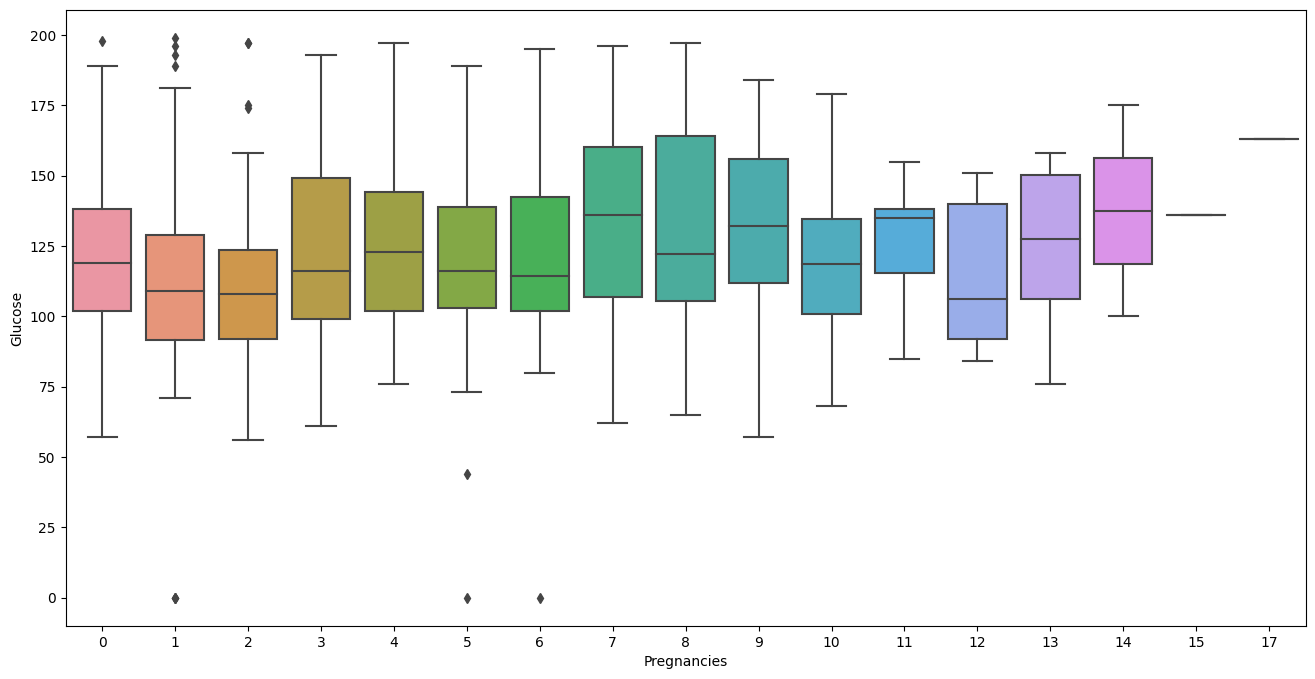

In [11]:
plt.figure(figsize=(16,8))
sns.boxplot(x="Pregnancies",y="Glucose",data=df,width=0.8,fliersize=5)

display the correlation between different variables

<Axes: >

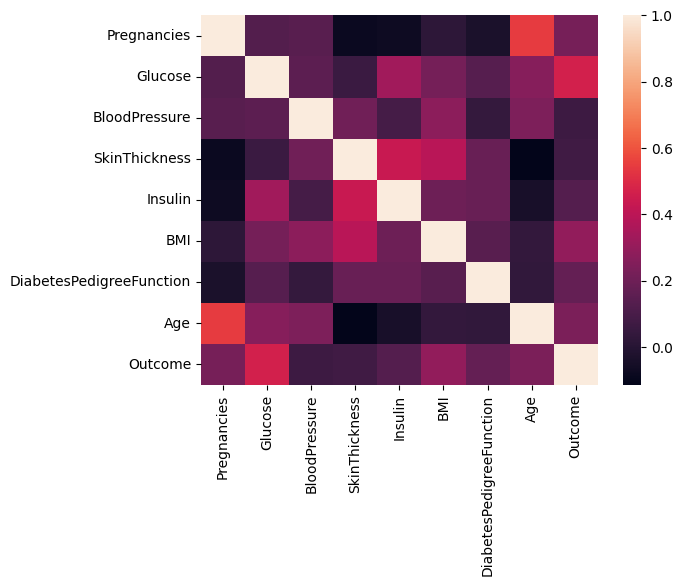

In [12]:
import seaborn as sns
sns.heatmap(df.corr())

# Train Linear regression with one variable


In [13]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
X=df[["Pregnancies"]]
Y=df["Glucose"]
LR.fit(X,Y)
yscore=LR.score(X,Y)
print("R square is :",yscore)

R square is : 0.016759547626356674


In [14]:

Y_hat=LR.predict(df[["Pregnancies"]])
print(Y_hat)

[123.54163281 117.39971741 125.99839897 117.39971741 116.17133433
 122.31324973 119.85648357 128.45516512 118.62810049 125.99839897
 121.08486665 128.45516512 128.45516512 117.39971741 122.31324973
 124.77001589 116.17133433 124.77001589 117.39971741 117.39971741
 119.85648357 125.99839897 124.77001589 127.22678204 129.6835482
 128.45516512 124.77001589 117.39971741 132.14031436 122.31324973
 122.31324973 119.85648357 119.85648357 123.54163281 128.45516512
 121.08486665 129.6835482  127.22678204 118.62810049 121.08486665
 119.85648357 124.77001589 124.77001589 127.22678204 124.77001589
 116.17133433 117.39971741 118.62810049 124.77001589 124.77001589
 117.39971741 117.39971741 122.31324973 125.99839897 124.77001589
 117.39971741 124.77001589 116.17133433 116.17133433 116.17133433
 118.62810049 125.99839897 122.31324973 118.62810049 124.77001589
 122.31324973 116.17133433 118.62810049 117.39971741 121.08486665
 118.62810049 122.31324973 132.14031436 121.08486665 117.39971741
 117.399717

# Coefficient and intercept

In [15]:
coeff=LR.coef_
intercept=LR.intercept_
print(coeff,intercept)

[1.22838308] 116.17133433260942


# Multiple linear Regression

In [16]:
Z=df[["Pregnancies","Age","Glucose","BMI"]]
LR.fit(Z,df["Outcome"])
score=LR.score(Z,df["Outcome"])
print("R square is:",score)
yhat=LR.predict(Z)
print(yhat)

R square is: 0.28455089407842815
[ 0.60444753  0.01331214  0.68333369  0.03366471  0.50214894  0.25820308
  0.05517835  0.4674328   0.77917396  0.10775807  0.35028829  0.81946249
  0.56635772  0.72077478  0.59622947  0.26258426  0.42035281  0.29629826
  0.32647622  0.28780674  0.43807652  0.38077304  0.9601259   0.39396666
  0.71273992  0.4997831   0.67437373  0.0224321   0.60051039  0.38495267
  0.40840773  0.53225845  0.02905848  0.06433058  0.44804023  0.14966095
  0.60805993  0.37887547  0.19544008  0.40527304  0.68535923  0.58993676
  0.24226349  0.95019787  0.59110583  0.7218933   0.40189865 -0.05045128
  0.38917173 -0.09211485  0.01088478  0.0664373   0.08060948  0.82503385
  0.63224083 -0.12178691  0.88208319  0.32784318  0.54611625  0.27300295
 -0.3192661   0.52465461 -0.15531883  0.32931873  0.39953973  0.20510702
  0.22026048  0.41841725 -0.02684085  0.44701423  0.19095432  0.42020595
  0.71725779  0.41539456  0.02528615 -0.52363801  0.09239846  0.27756899
  0.45357679  0.15

# Ploynomial Regression

In [17]:
import numpy as np

f = np.polyfit(df["Pregnancies"],df["Glucose"], 3)
#creates the polynomial features of order n
p = np.poly1d(f)
#p becomes the polynomial model used to generate the predicted output
Y_hat = p(df["Pregnancies"])
# Y_hat is the predicted output
print(Y_hat)


[124.08114972 117.10435742 127.76667732 117.10435742 117.28994911
 122.13076611 118.76317164 130.16733551 117.64532576 127.76667732
 120.30821259 130.16733551 130.16733551 117.10435742 122.13076611
 126.00968095 117.28994911 126.00968095 117.10435742 117.10435742
 118.76317164 127.76667732 126.00968095 129.20245633 130.51163237
 130.16733551 126.00968095 117.10435742 128.73974922 122.13076611
 122.13076611 118.76317164 118.76317164 124.08114972 130.16733551
 120.30821259 130.51163237 129.20245633 117.64532576 120.30821259
 118.76317164 126.00968095 126.00968095 129.20245633 126.00968095
 117.28994911 117.10435742 117.64532576 126.00968095 126.00968095
 117.10435742 117.10435742 122.13076611 127.76667732 126.00968095
 117.10435742 126.00968095 117.28994911 117.28994911 117.28994911
 117.64532576 127.76667732 122.13076611 117.64532576 126.00968095
 122.13076611 117.28994911 117.64532576 117.10435742 120.30821259
 117.64532576 122.13076611 128.73974922 120.30821259 117.10435742
 117.10435

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

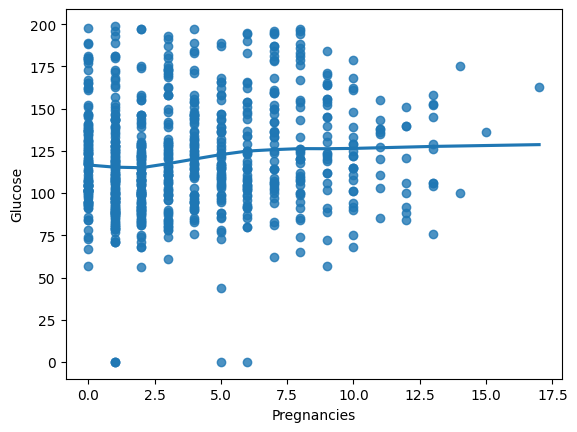

In [18]:
sns.regplot(data=df, x="Pregnancies", y="Glucose", lowess=True)